<h1>Part 2: Data Analysis of Rent Price Data</h1>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [22]:
df = pd.read_csv('data/renthub_data.csv')

/Users/anupamtripathi/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
df

,id,state,city,zip,address,property_type,beds,baths,sqft,price,lat,long,posted_at,marketing_desc,company,scraped_at
0,316859180,IL,Chicago,60610,805 N Laselle,Multi-family,0,1.0,584.0,1681.0,41.896870,-87.632466,2019-06-07 19:04:32.185,This rental property is brought to you by Corp...,NaN,2019-06-07 19:04:32.191
1,316859617,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.496,"1 Bed 1 Bath Split, Cots OK , Close to Green L...",Boardwalk Properties,2019-06-07 19:05:05.5
2,316859618,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.508,"1 Bed 1 Bath Split, Cots OK , Close to Green L...",Boardwalk Properties,2019-06-07 19:05:05.512
3,316859619,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.517,"1 Bed 1 Bath Split, Cots OK , Close to Green L...",Boardwalk Properties,2019-06-07 19:05:05.521
4,316859620,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.529,"1 Bed 1 Bath Split, Cots OK , Close to Green L...",Boardwalk Properties,2019-06-07 19:05:05.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515558,350279971,NY,New York,10001,261 W 28th St,condo,1,1.0,737.0,3750.0,40.748445,-73.995905,2021-02-16 05:20:30,NEW TO THE MARKET! NO FEE! (Brokers CYOF) \n\n...,Douglas Elliman,2021-02-18 07:39:03.07
33515559,350279972,NY,New York,10001,261 W 28th St,condo,2,2.5,1214.0,5400.0,40.748445,-73.995905,2021-02-16 05:20:30,NEW TO THE MARKET! NO FEE! (Brokers CYOF) \n\n...,Douglas Elliman,2021-02-18 07:39:03.082
33515560,350279973,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6500.0,40.748445,-73.995905,2021-02-16 05:20:30,NEW TO THE MARKET! NO FEE! (Brokers CYOF) \n\n...,Douglas Elliman,2021-02-18 07:39:03.09
33515561,350279974,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6600.0,40.748445,-73.995905,2021-02-16 05:20:30,NEW TO THE MARKET! NO FEE! (Brokers CYOF) \n\n...,Douglas Elliman,2021-02-18 07:39:03.099


In [24]:
# Delete unwanted colomn to save on processing time
del df['marketing_desc']

In [25]:
df.to_csv('temp.csv')

In [27]:
df.describe()

,id,beds,baths,sqft,price,lat,long
count,3.351556e+07,3.351556e+07,3.351543e+07,3.135883e+07,3.351556e+07,3.351556e+07,3.351556e+07
mean,3.334877e+08,1.751091e+00,1.517055e+00,1.060844e+03,1.850932e+03,3.646783e+01,-9.277894e+01
std,9.723007e+06,1.003840e+00,6.214640e-01,5.798850e+02,1.072279e+03,5.121233e+00,1.484587e+01
min,3.165907e+08,-1.000000e+00,0.000000e+00,2.000000e+02,3.010000e+02,1.000000e+00,-1.779168e+02
25%,3.251432e+08,1.000000e+00,1.000000e+00,7.350000e+02,1.214000e+03,3.283720e+01,-9.857710e+01
50%,3.335221e+08,2.000000e+00,1.000000e+00,9.500000e+02,1.603000e+03,3.615663e+01,-9.327002e+01
75%,3.419009e+08,2.000000e+00,2.000000e+00,1.208000e+03,2.188000e+03,4.074506e+01,-8.022544e+01
max,3.502800e+08,8.000000e+00,8.000000e+00,1.000000e+04,1.999900e+04,6.487238e+01,1.221333e+02


## Dealing with duplicate values
For duplicate values, we need to delete only the ones that have same posted dates, since a unit can be listed multiple times over years. 

In [28]:
df = df.drop_duplicates(
    subset = ['address', 'sqft', 'lat', 'long', 'posted_at'],
    keep = 'first').reset_index(drop = True)

In [29]:
df

,id,state,city,zip,address,property_type,beds,baths,sqft,price,lat,long,posted_at,company,scraped_at
0,316859180,IL,Chicago,60610,805 N Laselle,Multi-family,0,1.0,584.0,1681.0,41.896870,-87.632466,2019-06-07 19:04:32.185,NaN,2019-06-07 19:04:32.191
1,316859617,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.496,Boardwalk Properties,2019-06-07 19:05:05.5
2,316859618,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.508,Boardwalk Properties,2019-06-07 19:05:05.512
3,316859619,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.517,Boardwalk Properties,2019-06-07 19:05:05.521
4,316859620,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.529,Boardwalk Properties,2019-06-07 19:05:05.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31390667,350279970,TX,Houston,77063,3400 Ocee St,apartment building,2,2.0,1050.0,845.0,29.726728,-95.530611,2021-02-17 02:36:21,American Realty Investors,2021-02-18 07:39:02.996
31390668,350279971,NY,New York,10001,261 W 28th St,condo,1,1.0,737.0,3750.0,40.748445,-73.995905,2021-02-16 05:20:30,Douglas Elliman,2021-02-18 07:39:03.07
31390669,350279972,NY,New York,10001,261 W 28th St,condo,2,2.5,1214.0,5400.0,40.748445,-73.995905,2021-02-16 05:20:30,Douglas Elliman,2021-02-18 07:39:03.082
31390670,350279973,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6500.0,40.748445,-73.995905,2021-02-16 05:20:30,Douglas Elliman,2021-02-18 07:39:03.09


In [30]:
df_hold = pd.DataFrame(df).copy()

In [52]:
df = pd.DataFrame(df_hold).copy()

Our new dataset contains much lesser number of rows. It is around 1/10th of our original data. 

## Exploratory analysis
Lets see the stats for the difference between the date posted and the 

In [53]:
df['posted_at'] = pd.to_datetime(df['posted_at'])
df['scraped_at'] = pd.to_datetime(df['scraped_at'])
df['posted_difference'] = df['scraped_at'] - df['posted_at']
print('99th percentile: ', df['posted_difference'].quantile(0.99))
df['posted_difference'].describe()

99th percentile:  30 days 20:03:12.921619998


count                     31390672
mean     2 days 05:03:48.545795909
std      7 days 05:23:06.584339717
min       -1 days +23:59:54.409000
25%         0 days 00:00:00.219000
50%         0 days 00:00:00.995000
75%         0 days 10:16:58.923500
max       486 days 07:11:03.862000
Name: posted_difference, dtype: object

With a standard deviation of around 15 days, units with posted difference of greater than 90 days can be considered as outliers and be removed

In [54]:
df = df[df['posted_difference'].astype('timedelta64[D]') <= 90]

In [55]:
df

,id,state,city,zip,address,property_type,beds,baths,sqft,price,lat,long,posted_at,company,scraped_at,posted_difference
0,316859180,IL,Chicago,60610,805 N Laselle,Multi-family,0,1.0,584.0,1681.0,41.896870,-87.632466,2019-06-07 19:04:32.185,NaN,2019-06-07 19:04:32.191,0 days 00:00:00.006000
1,316859617,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.496,Boardwalk Properties,2019-06-07 19:05:05.500,0 days 00:00:00.004000
2,316859618,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.508,Boardwalk Properties,2019-06-07 19:05:05.512,0 days 00:00:00.004000
3,316859619,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.517,Boardwalk Properties,2019-06-07 19:05:05.521,0 days 00:00:00.004000
4,316859620,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.529,Boardwalk Properties,2019-06-07 19:05:05.533,0 days 00:00:00.004000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31390667,350279970,TX,Houston,77063,3400 Ocee St,apartment building,2,2.0,1050.0,845.0,29.726728,-95.530611,2021-02-17 02:36:21.000,American Realty Investors,2021-02-18 07:39:02.996,1 days 05:02:41.996000
31390668,350279971,NY,New York,10001,261 W 28th St,condo,1,1.0,737.0,3750.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.070,2 days 02:18:33.070000
31390669,350279972,NY,New York,10001,261 W 28th St,condo,2,2.5,1214.0,5400.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.082,2 days 02:18:33.082000
31390670,350279973,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6500.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.090,2 days 02:18:33.090000


<br>Not all zip codes contain the same number of houses, so we need to remove the ones that contain number of houses less than a certain threshold. To get this threshold, we will need to visualize this dataset.

62002


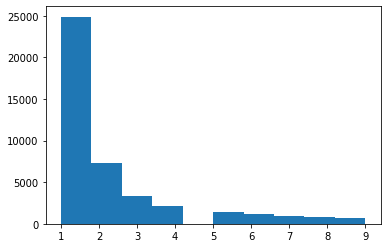

In [56]:
counts = df.groupby(by="zip").id.count()
print(len(counts))
counts = counts[counts < 10]
_ = plt.hist(counts)

Out of around 60,000 zipcodes in our dataset, around 40,000 have 2 or lesser number of entries. We will be considering only the ones that have 3 or more entires since the graphs that we are targeting need to have multiple entries. Also for aggregation metrics, all types of metrics can be dominated by outliers for even 2 entires and so we need at least 3. This may look like dropping a lot of rows, but in reality they make up a really small part of our dataset. 

In [57]:
df = df[~df['zip'].isin(counts[counts < 3].index)]

In [58]:
df

,id,state,city,zip,address,property_type,beds,baths,sqft,price,lat,long,posted_at,company,scraped_at,posted_difference
0,316859180,IL,Chicago,60610,805 N Laselle,Multi-family,0,1.0,584.0,1681.0,41.896870,-87.632466,2019-06-07 19:04:32.185,NaN,2019-06-07 19:04:32.191,0 days 00:00:00.006000
1,316859617,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.496,Boardwalk Properties,2019-06-07 19:05:05.500,0 days 00:00:00.004000
2,316859618,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.508,Boardwalk Properties,2019-06-07 19:05:05.512,0 days 00:00:00.004000
3,316859619,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.517,Boardwalk Properties,2019-06-07 19:05:05.521,0 days 00:00:00.004000
4,316859620,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.529,Boardwalk Properties,2019-06-07 19:05:05.533,0 days 00:00:00.004000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31390667,350279970,TX,Houston,77063,3400 Ocee St,apartment building,2,2.0,1050.0,845.0,29.726728,-95.530611,2021-02-17 02:36:21.000,American Realty Investors,2021-02-18 07:39:02.996,1 days 05:02:41.996000
31390668,350279971,NY,New York,10001,261 W 28th St,condo,1,1.0,737.0,3750.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.070,2 days 02:18:33.070000
31390669,350279972,NY,New York,10001,261 W 28th St,condo,2,2.5,1214.0,5400.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.082,2 days 02:18:33.082000
31390670,350279973,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6500.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.090,2 days 02:18:33.090000


This is not enough. We also need to remove the zip codes that have just one distinct month in them, since the intended visualization in that case will be just be a single point. 

In [59]:
df['posted_month'] = df['posted_at'].dt.date + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
df_zip_month = df[['id', 'zip', 'posted_month']].drop_duplicates()
zip_month_counts = df_zip_month.groupby('zip')['id'].count()
zip_month_counts

<ipython-input-59-1bee2ebb7a67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posted_month'] = df['posted_at'].dt.date + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)


zip
0               27
2019          1727
2038          7822
2043          2482
2109          4851
              ... 
V6E0C2           3
V6G1G2           3
V6G1P8           4
ZRNEmail        21
https://ww      21
Name: id, Length: 29849, dtype: int64

In [60]:
df_hold_2 = pd.DataFrame(df).copy()

In [61]:
zip_month_counts = zip_month_counts[zip_month_counts < 2]
df = df[~df['zip'].isin(zip_month_counts.index)]
df

,id,state,city,zip,address,property_type,beds,baths,sqft,price,lat,long,posted_at,company,scraped_at,posted_difference,posted_month
0,316859180,IL,Chicago,60610,805 N Laselle,Multi-family,0,1.0,584.0,1681.0,41.896870,-87.632466,2019-06-07 19:04:32.185,NaN,2019-06-07 19:04:32.191,0 days 00:00:00.006000,2019-06-01
1,316859617,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.496,Boardwalk Properties,2019-06-07 19:05:05.500,0 days 00:00:00.004000,2019-06-01
2,316859618,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.508,Boardwalk Properties,2019-06-07 19:05:05.512,0 days 00:00:00.004000,2019-06-01
3,316859619,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.517,Boardwalk Properties,2019-06-07 19:05:05.521,0 days 00:00:00.004000,2019-06-01
4,316859620,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.529,Boardwalk Properties,2019-06-07 19:05:05.533,0 days 00:00:00.004000,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31390667,350279970,TX,Houston,77063,3400 Ocee St,apartment building,2,2.0,1050.0,845.0,29.726728,-95.530611,2021-02-17 02:36:21.000,American Realty Investors,2021-02-18 07:39:02.996,1 days 05:02:41.996000,2021-02-01
31390668,350279971,NY,New York,10001,261 W 28th St,condo,1,1.0,737.0,3750.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.070,2 days 02:18:33.070000,2021-02-01
31390669,350279972,NY,New York,10001,261 W 28th St,condo,2,2.5,1214.0,5400.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.082,2 days 02:18:33.082000,2021-02-01
31390670,350279973,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6500.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.090,2 days 02:18:33.090000,2021-02-01


## Cleaning
Any row will nan in the zip column or posted at column needs to be removed. <br> We have few rows that have non alphanumeric characters in zip code column, so we need to remove those rows.

In [62]:
df = df[df.zip.notna()]
df = df[df.posted_at.notna()]
df = df[~df.zip.str.contains(r'[^\w\s]', na=False)]

31262053
31262053
31200634


In [63]:
df

,id,state,city,zip,address,property_type,beds,baths,sqft,price,lat,long,posted_at,company,scraped_at,posted_difference,posted_month
0,316859180,IL,Chicago,60610,805 N Laselle,Multi-family,0,1.0,584.0,1681.0,41.896870,-87.632466,2019-06-07 19:04:32.185,NaN,2019-06-07 19:04:32.191,0 days 00:00:00.006000,2019-06-01
1,316859617,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.496,Boardwalk Properties,2019-06-07 19:05:05.500,0 days 00:00:00.004000,2019-06-01
2,316859618,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.508,Boardwalk Properties,2019-06-07 19:05:05.512,0 days 00:00:00.004000,2019-06-01
3,316859619,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.517,Boardwalk Properties,2019-06-07 19:05:05.521,0 days 00:00:00.004000,2019-06-01
4,316859620,MA,Boston,02134,1 President Terrace,Multi-family,1,1.0,NaN,1825.0,42.353481,-71.129072,2019-06-07 19:05:05.529,Boardwalk Properties,2019-06-07 19:05:05.533,0 days 00:00:00.004000,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31390667,350279970,TX,Houston,77063,3400 Ocee St,apartment building,2,2.0,1050.0,845.0,29.726728,-95.530611,2021-02-17 02:36:21.000,American Realty Investors,2021-02-18 07:39:02.996,1 days 05:02:41.996000,2021-02-01
31390668,350279971,NY,New York,10001,261 W 28th St,condo,1,1.0,737.0,3750.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.070,2 days 02:18:33.070000,2021-02-01
31390669,350279972,NY,New York,10001,261 W 28th St,condo,2,2.5,1214.0,5400.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.082,2 days 02:18:33.082000,2021-02-01
31390670,350279973,NY,New York,10001,261 W 28th St,condo,2,2.5,1265.0,6500.0,40.748445,-73.995905,2021-02-16 05:20:30.000,Douglas Elliman,2021-02-18 07:39:03.090,2 days 02:18:33.090000,2021-02-01


In [64]:
df_temp = pd.DataFrame(df).copy()

## Create featues for appropirate graphs
Below given function transforms the data in the best way posible to be visualized in the format provided in the example. It takes the zip code we want to visialize for as an argument. We can make multiple calls in case of multiple zip codes. 

In [65]:
def aggregate_on_attribute(df, zip_code, col, agg='mean'):
    df = df[df['zip'] == zip_code]
    df_1 = df[['id', col, 'posted_at', 'zip']]
    df_1['month'] = (df_1['posted_at'] + pd.offsets.MonthBegin(1)).dt.date
    df_2 = df[['id', col, 'posted_at', 'zip']]
    df_2['month'] = (df_2['posted_at'] + pd.offsets.MonthBegin(2)).dt.date
    df_3 = df[['id', col, 'posted_at', 'zip']]
    df_3['month'] = (df_3['posted_at'] + pd.offsets.MonthBegin(3)).dt.date
    df_features = pd.concat([df_1, df_2, df_3])
    if agg == 'mean':
        grouped_df = df_features.groupby(by='month')[col].mean()
    elif agg == 'max':
        grouped_df = df_features.groupby(by='month')[col].max()
    elif agg == 'min':
        grouped_df = df_features.groupby(by='month')[col].min()
    else:
        print('agg can be one of mean, min, max')
        return
    return grouped_df
df_features = aggregate_on_attribute(df, 10001, 'price', 'mean')
df_features

<ipython-input-65-23035748935f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['month'] = (df_1['posted_at'] + pd.offsets.MonthBegin(1)).dt.date
<ipython-input-65-23035748935f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['month'] = (df_2['posted_at'] + pd.offsets.MonthBegin(2)).dt.date
<ipython-input-65-23035748935f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

month
2019-08-01    4774.181818
2019-09-01    4212.375839
2019-10-01    4305.202703
2019-11-01    4328.269553
2019-12-01    4358.524313
2020-01-01    4386.355769
2020-02-01    4389.258427
2020-03-01    4597.000000
Name: price, dtype: float64

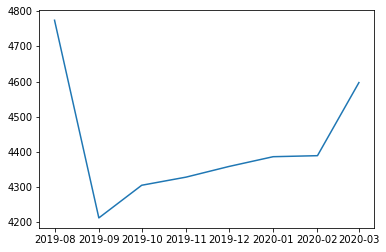

In [66]:
plt.plot(df_features)

<ipython-input-65-23035748935f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['month'] = (df_1['posted_at'] + pd.offsets.MonthBegin(1)).dt.date
<ipython-input-65-23035748935f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['month'] = (df_2['posted_at'] + pd.offsets.MonthBegin(2)).dt.date
<ipython-input-65-23035748935f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

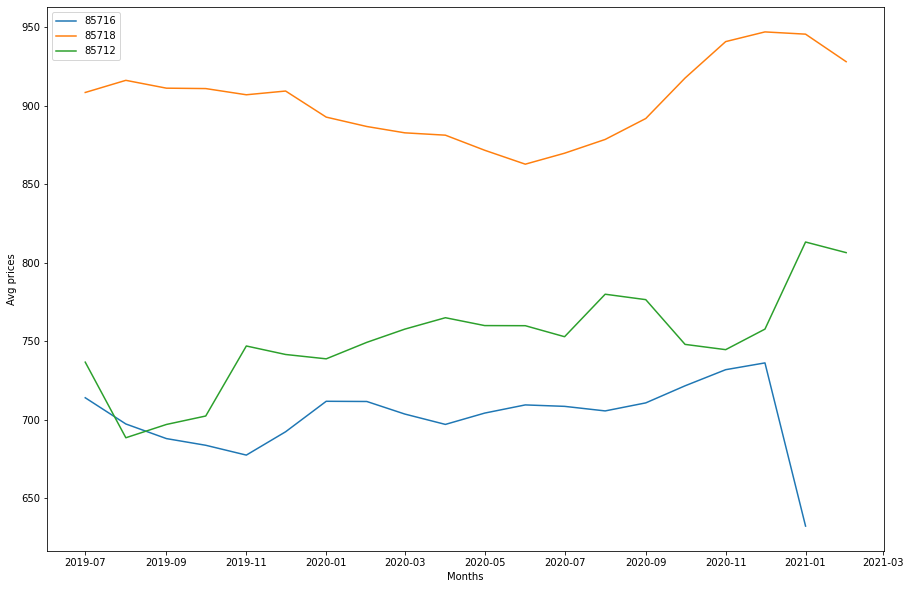

In [72]:
# for multiple zip codes

plt.figure(figsize=(15,10))
for zip_code in [85716, 85718, 85712]:
    plt.plot(aggregate_on_attribute(df, zip_code, 'price', 'mean'), label=zip_code)
plt.xlabel('Months')
plt.ylabel('Avg prices')
plt.legend()

Summary:
- The ETL pipeline given above reads data, removes all unwanted rows, features and duplicates, and finally puts in such a format that visualization is easy. 